<a href="https://colab.research.google.com/github/tharushaRukshanRavindra/SDGP/blob/main/manual_ASL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
print(tf. __version__)
from glob import glob
import pathlib


#Importing keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.layers.recurrent import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K
from tensorflow.keras import layers


2.8.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#giving the path of the data set main data set ps-not to the sub directories
image_path = "/content/drive/MyDrive/MOCK_DATA/"

In [12]:
a_path = "/content/drive/MyDrive/MOCK_DATA/A"
a_length = len(list(glob(a_path + "/*.jpg")))
print(a_length)

60


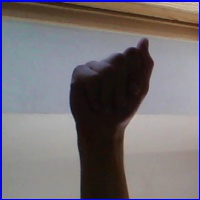

In [13]:
A = list(glob(a_path + "/*.jpg"))
PIL.Image.open(str(A[0]))

In [14]:
#Image shape 
image = cv2.imread(A[10])
print(image.shape)

(200, 200, 3)


In [15]:
#expected 300 - all the images has been loaded 
all_images = len(list(glob(image_path + "*/*.jpg")))
print(all_images)

300


In [16]:
batch_size = 60
img_height = 128
img_width = 128

In [17]:
#80% trainnin data
train_ds = tf.keras.utils.image_dataset_from_directory(
  image_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 5 classes.
Using 240 files for training.


In [18]:
#20 training
val_ds = tf.keras.utils.image_dataset_from_directory(
  image_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 5 classes.
Using 60 files for validation.


In [19]:
#to confirm the classes name
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E']


In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(60, 128, 128, 3)
(60,)


In [21]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3, 3),  strides=(1, 1),  padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3),  strides=(1, 1),  padding="same", activation="relu"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes , activation = 'softmax')
])


#https://www.tensorflow.org/tutorials/images/classification#compile_the_model
#https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb#scrollTo=SbtTDYhOHZb6
# https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 65536)             0

In [24]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/9


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/modelWeights.h5') 


In [ ]:
# import tensorflow as tf
# from tensorflow import lite
# from tensorflow.keras.models import load_model
# converter = lite.TFLiteConverter.from_keras_model(model)
# tfmodel = converter.convert()
# open ("model.tflite" , "wb") .write(tfmodel)

In [ ]:
#creating a get letter method
def getLetters(results):
  classLabels = {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "E" }

  try:
    res = int(results)
    return classLabels[res]

  except:
    return "Error"


In [ ]:
# from pyparsing import results
# from google.colab.patches import cv2
# cap = cv2.VideoCapture(0)
# while True:
#     ret, frame = cap.read()

#     # defining region of intreset
#     roi = image[100:400, 320:620]
#     roi = cv2.cvtColor(roi, cv2.BGR2GRAY)
#     roi = cv2.resize(roi, (128, 128), interpolation =cv2.INTER_AREA)

#     cv2.imshow('roi sclaed and gray', roi )
#     copy = frame.copy()
#     cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
#     roi = roi.reshape(1, 128, 128, 3)

#     result = str(model.predict_classes(roi, 3, verbose = 0)[0])
#     cv2.putText(copy, getLetters(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2,(0, 255, 0), 2)
#     cv2.imshow('frame', copy)
